# WeatherPy by Paola VDW

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
  
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']#[''] #add "dt" for date?

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | luanda
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | sandnessjoen
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | taro
Processing Record 14 of Set 1 | kingston
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | flying fish cove
Processing Record 18 of Set 1 | makarska
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | minas de marcona
Processing Record 21 of Set 1 | khandyga
Processing Record 22 of Set 1 | adamstown
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,30.43,76,0,6.17,US,1719428789
1,shingu,33.7333,135.9833,21.18,76,100,1.46,JP,1719428790
2,luanda,-8.8368,13.2343,23.00,83,75,2.06,AO,1719428790
3,waitangi,-43.9535,-176.5597,9.90,82,100,3.58,NZ,1719428791
4,papatowai,-46.5619,169.4708,6.16,94,100,2.78,NZ,1719428791


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,30.43,76,0,6.17,US,1719428789
1,shingu,33.7333,135.9833,21.18,76,100,1.46,JP,1719428790
2,luanda,-8.8368,13.2343,23.00,83,75,2.06,AO,1719428790
3,waitangi,-43.9535,-176.5597,9.90,82,100,3.58,NZ,1719428791
4,papatowai,-46.5619,169.4708,6.16,94,100,2.78,NZ,1719428791


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

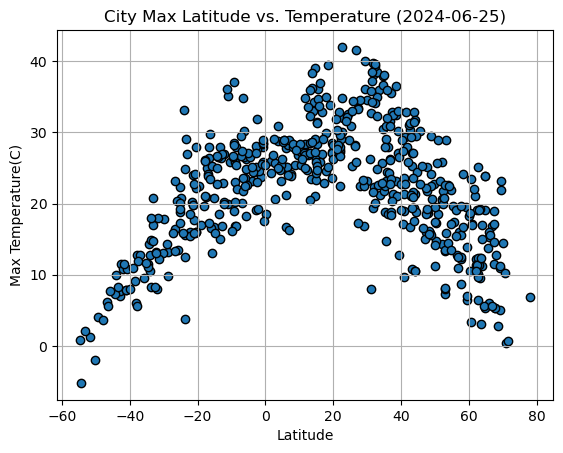

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2024-06-25)')
plt.grid()
plt.scatter(latitude,temperature, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

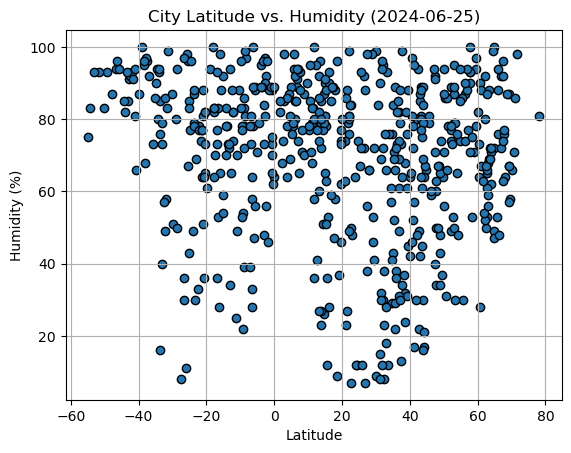

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-25)')
plt.grid()
plt.scatter(latitude,humidity, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

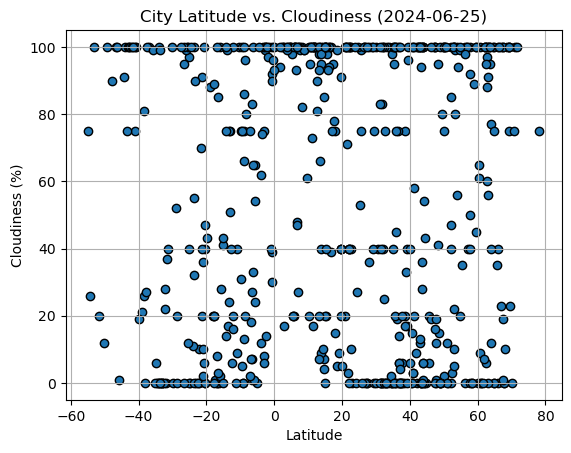

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-25)')
plt.grid()
plt.scatter(latitude,cloudiness, edgecolors='black')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

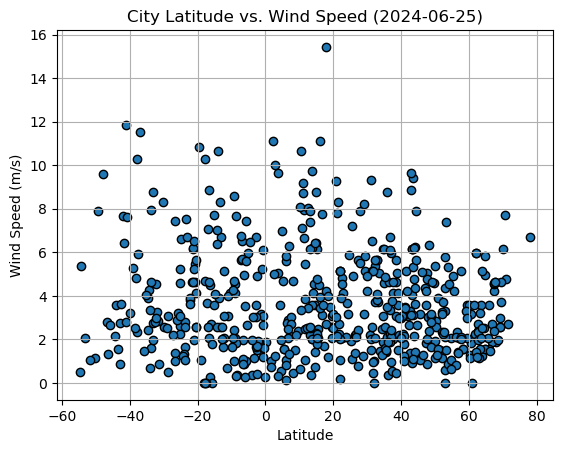

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-06-25)')
plt.grid()
plt.scatter(latitude,wind, edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy import stats
def linear_regression_plot(x_value, y_value, hemisphere):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
    line = slope * x_value + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,30.43,76,0,6.17,US,1719428789
1,shingu,33.7333,135.9833,21.18,76,100,1.46,JP,1719428790
5,sandnessjoen,66.0217,12.6316,15.29,76,0,3.60,NO,1719428792
6,bilibino,68.0546,166.4372,12.71,64,10,1.89,RU,1719428793
7,albany,42.6001,-73.9662,30.37,49,100,1.34,US,1719428793


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,luanda,-8.8368,13.2343,23.00,83,75,2.06,AO,1719428790
3,waitangi,-43.9535,-176.5597,9.90,82,100,3.58,NZ,1719428791
4,papatowai,-46.5619,169.4708,6.16,94,100,2.78,NZ,1719428791
9,carnarvon,-24.8667,113.6333,20.80,77,0,6.61,AU,1719428795
11,bredasdorp,-34.5322,20.0403,11.44,94,0,2.45,ZA,1719428796


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.39661790583568285


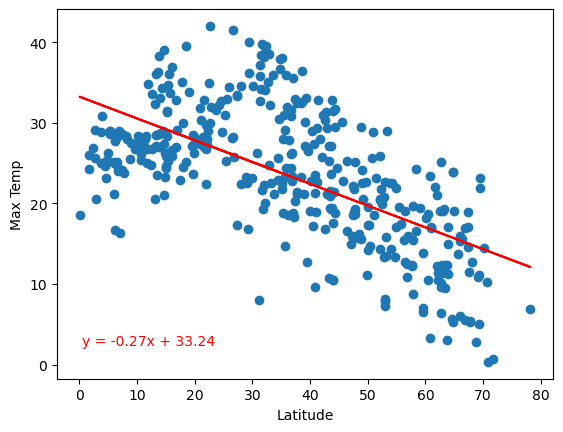

In [15]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.6713606936672892


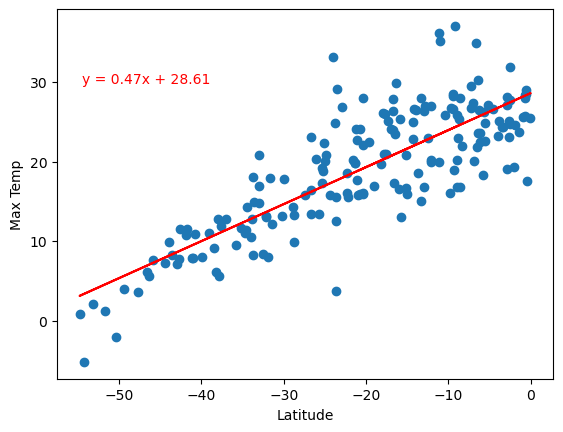

In [16]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in the northern hemisphere shows a negative correlation. As the latitude increases, the temperature decreases. This happens because the latitude gets further away from the equator (imaginary line around the earth with higher sun exposure).
The linear regression in the southern hemisphere shows a positive correlation. As the latitude increases, the temperature increases. This happens because the latitude gets closer to the equator(imaginary line around the earth with higher sun exposure). The r-value is greater in the southern hemisphere compared to the northern hemisphere because it has a higher variance in temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00012463915481883002


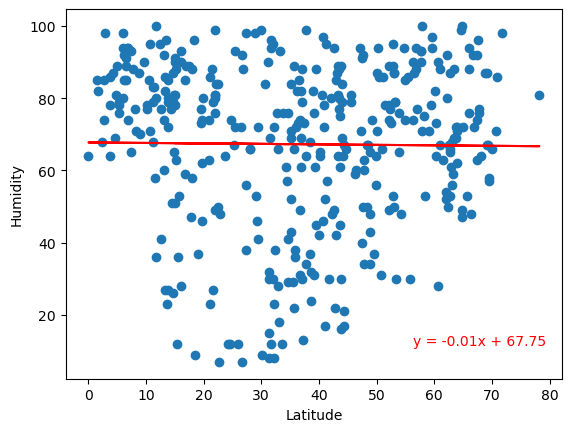

In [17]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.7, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")
plt.show()

The r-value is: 0.028945589550265497


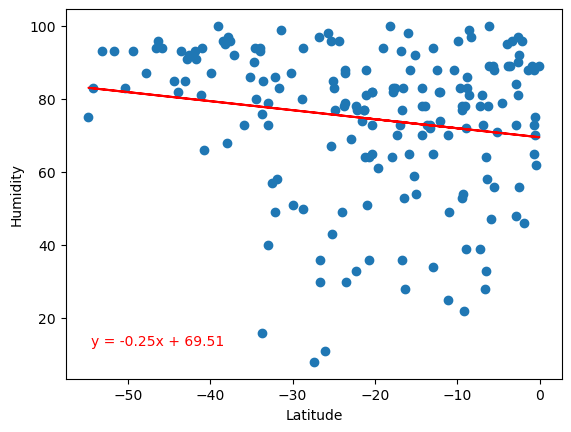

In [18]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.09), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in the northern hemisphere shows a very small negative correlation. As the latitude increases, the humidity decreases just by a tiny bit.  
The linear regression in the southern hemisphere shows a negative correlation as well. As the latitude increases, the humidity decreases. The r-value is greater in the southern hemisphere compared to the northern hemisphere because it has a higher variance (slope) in humidity. This might be an indicator that the northern hemisphere is more humid in comparision to the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0229226074715884


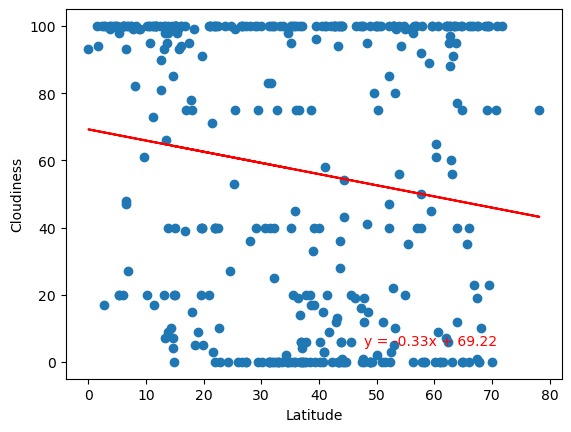

In [19]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.6, .09), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.00023264215596644023


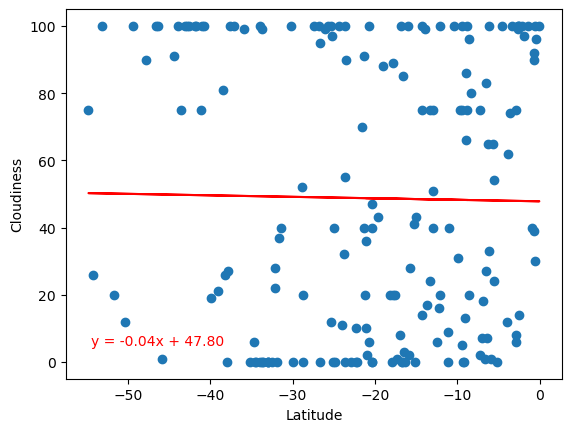

In [20]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.09), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in both, the northern & southern hemisphere, show a negative correlation. As the latitude increases, the cloudiness decreases. They both have a negative slope. The r-value in the southern hemisphere is extremely low which may indicate that there is little variance in the cloudiness when it comes to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.029526625013712615


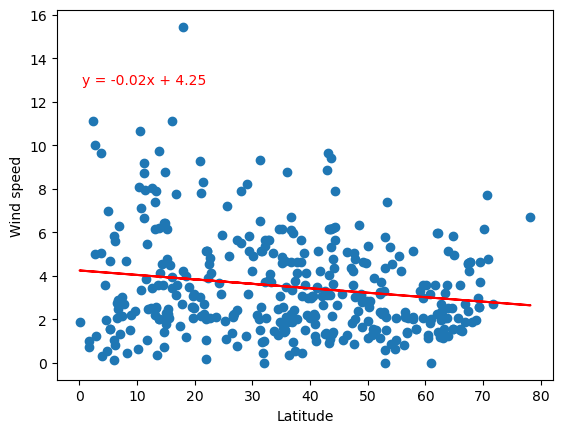

In [21]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
hemisphere = 'Northern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind speed')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')

print(f"The r-value is: {r_value**2}")  
plt.show()

The r-value is: 0.012381975768402132


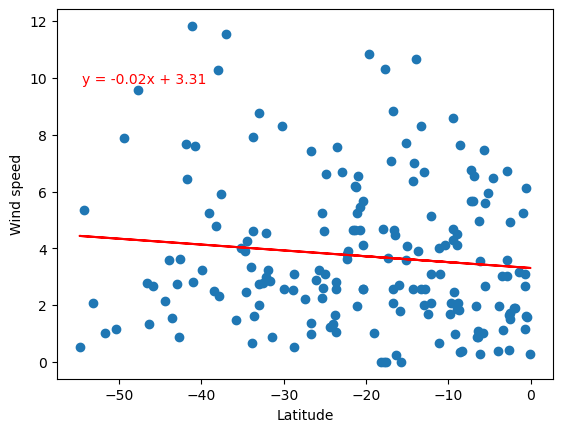

In [22]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
hemisphere = 'Southern'
slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)
line = slope * x_value + intercept

plt.scatter(x_value, y_value, color='tab:blue')
plt.plot(x_value, line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind speed')

plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05,.8), xycoords='axes fraction', color='red')
print(f"The r-value is: {r_value**2}")
plt.show()

**Discussion about the linear relationship:** 
The linear regression in both, the northern & southern hemisphere, show a negative correlation. As the latitude increases, the wind speed decreases. They both have a negative slope. The r-value in the northern hemisphere is higher than the southern hemisphere which may indicate that positive latitudes are characterized by faster winds.